# TP7 - Breast Cancer Dataset
## Mateus Ribeiro da Silva

In [79]:
#Import libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix, classification_report

In [80]:
#Import Dataset
cancer_tissues = pd.read_csv("https://raw.githubusercontent.com/emmanueliarussi/DataScienceCapstone/master/3_MidtermProjects/ProjectBCD/data/data.csv", index_col='id')
cancer_tissues.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
id,,,,,,,,,,,,,,,,,,,,,
842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [81]:
#It seems that last column don't bring any kind of information, so let's drop it.

cancer_tissues = cancer_tissues.drop(['Unnamed: 32'], axis=1)
cancer_tissues.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
id,,,,,,,,,,,,,,,,,,,,,
842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [82]:
#Let's check if there is some missing values
cancer_tissues.isnull().sum()

diagnosis                  0
radius_mean                0
texture_mean               0
perimeter_mean             0
area_mean                  0
smoothness_mean            0
compactness_mean           0
concavity_mean             0
concave points_mean        0
symmetry_mean              0
fractal_dimension_mean     0
radius_se                  0
texture_se                 0
perimeter_se               0
area_se                    0
smoothness_se              0
compactness_se             0
concavity_se               0
concave points_se          0
symmetry_se                0
fractal_dimension_se       0
radius_worst               0
texture_worst              0
perimeter_worst            0
area_worst                 0
smoothness_worst           0
compactness_worst          0
concavity_worst            0
concave points_worst       0
symmetry_worst             0
fractal_dimension_worst    0
dtype: int64

In [83]:
#There is no missing values, so now we can take a look in general information from dataset

cancer_tissues.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 569 entries, 842302 to 92751
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   diagnosis                569 non-null    object 
 1   radius_mean              569 non-null    float64
 2   texture_mean             569 non-null    float64
 3   perimeter_mean           569 non-null    float64
 4   area_mean                569 non-null    float64
 5   smoothness_mean          569 non-null    float64
 6   compactness_mean         569 non-null    float64
 7   concavity_mean           569 non-null    float64
 8   concave points_mean      569 non-null    float64
 9   symmetry_mean            569 non-null    float64
 10  fractal_dimension_mean   569 non-null    float64
 11  radius_se                569 non-null    float64
 12  texture_se               569 non-null    float64
 13  perimeter_se             569 non-null    float64
 14  area_se            

In [84]:
cancer_tissues.describe()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


In [85]:
#The first analysis is that there are many variables, so it would be insteresting using some dimensionality-reduction.
#The target variable need to be encoded for numerical value. Where 1 is Malignant and 0 is benign.

encoder = LabelEncoder()
cancer_tissues['diagnosis'] = encoder.fit_transform(cancer_tissues['diagnosis'])

cancer_tissues.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
id,,,,,,,,,,,,,,,,,,,,,
842302,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
842517,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
84300903,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
84348301,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
84358402,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


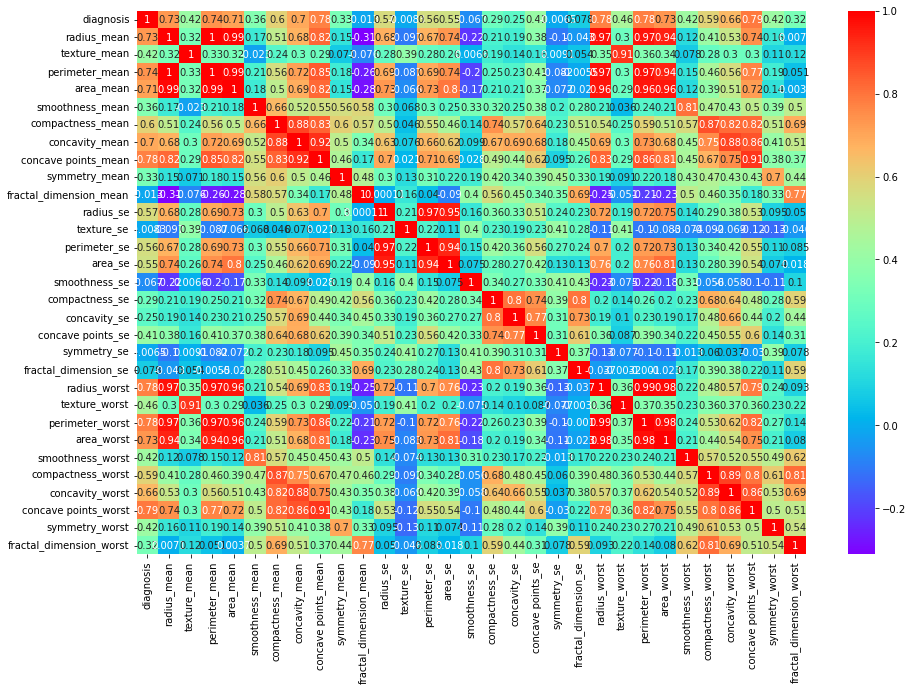

In [86]:
#Correlation heatmap
#In correlation map we can that many features have high correlation with others, showing that, in fact, it will be necessary treat the data choosing and excluding some unecessary columns. The target seem to be correlated with many variables too.

plt.figure(figsize=(15,10))
sns.heatmap(cancer_tissues.corr(), cmap='rainbow', annot=True)

/home/mateusrib/.local/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/home/mateusrib/.local/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/home/mateusrib/.local/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or

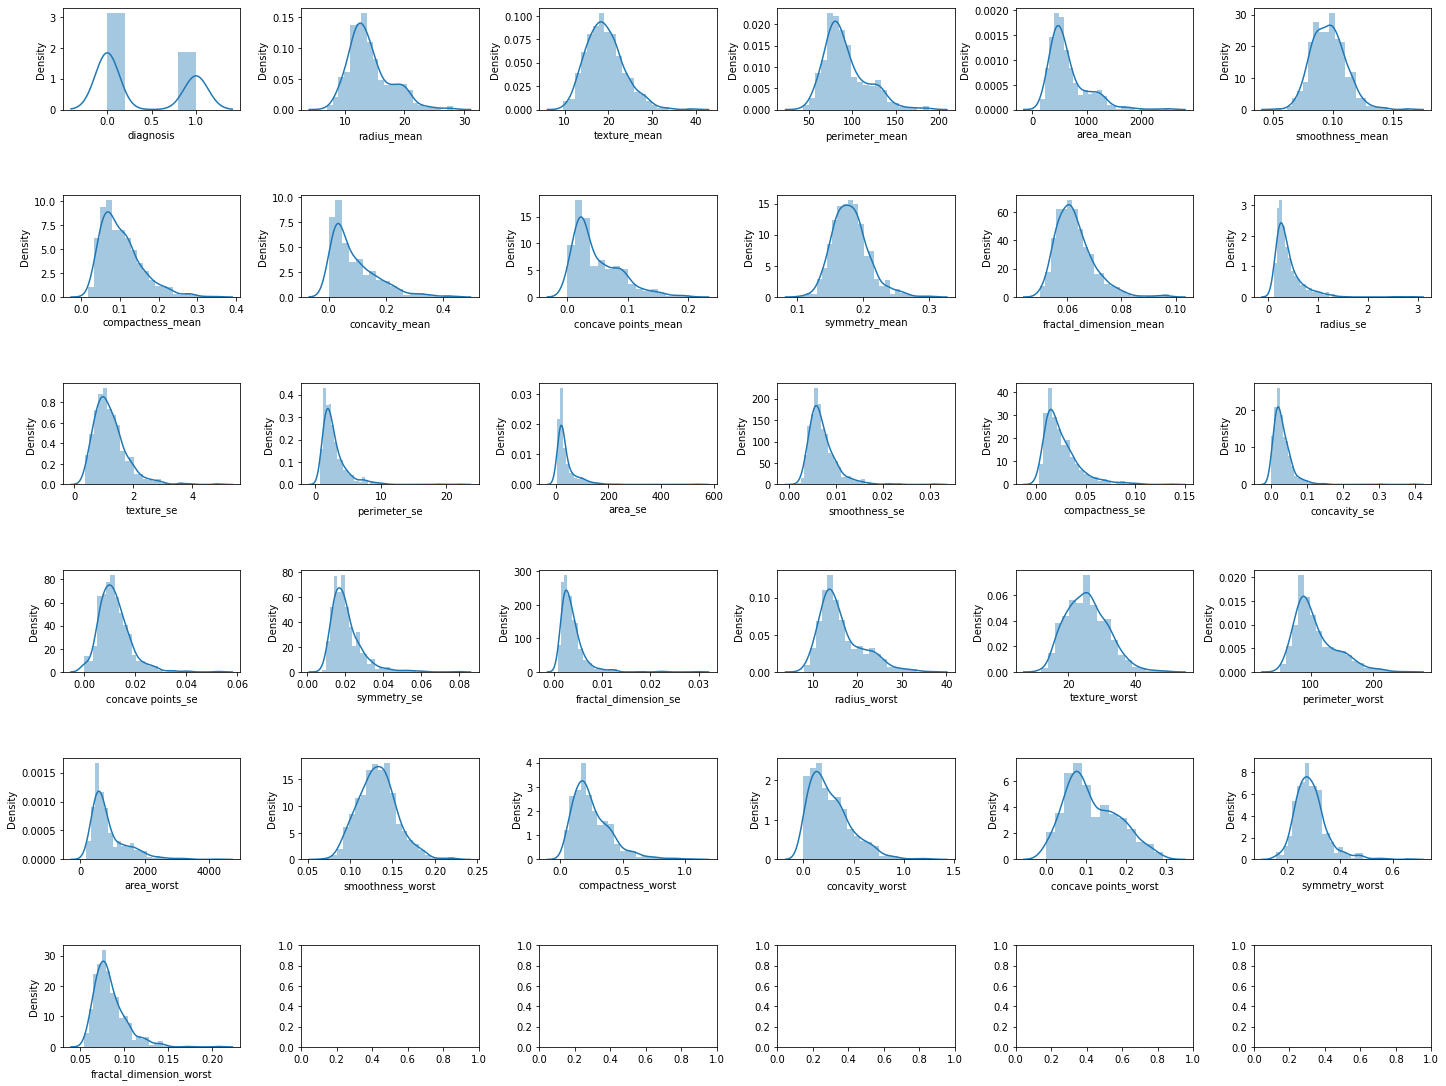

In [87]:
#Many variables seems to have normal distribution, unless close to it, and others have a little skewness. So there are many candidates to describe sucessfully the problem.

fig, axs = plt.subplots(ncols=6, nrows=6, figsize=(20, 15))
index = 0
axs = axs.flatten()
for k,v in cancer_tissues.items():
    sns.distplot(v, ax=axs[index])
    index += 1
plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=5.0)

Text(0, 0.5, 'Cumulative Explained Variance Ratio')

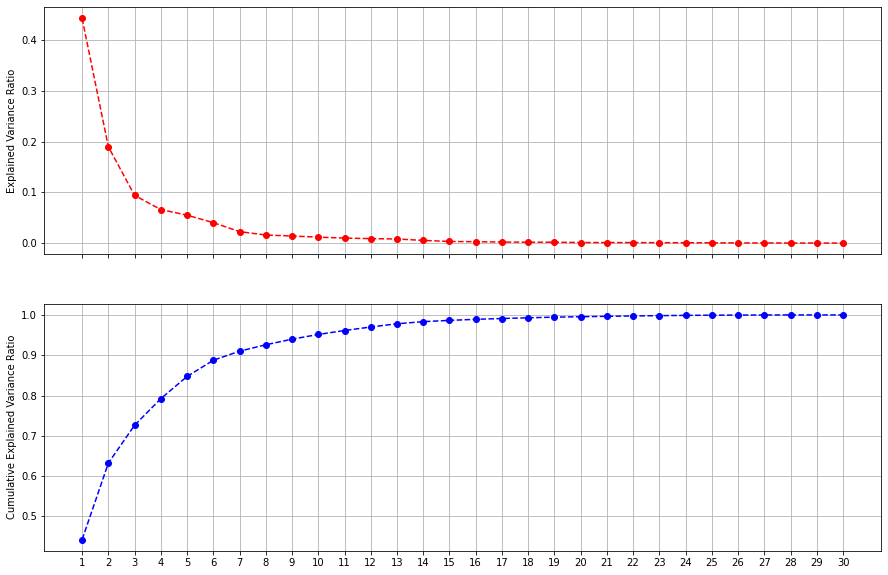

In [88]:
#In first moment Principal Component Analysis (PCA) will be used for dimensionality-reduction. As we had seen in correlation heatmap, there are many multicollinearity, so such technique is very useful to detect what are the important features on dataset, and who are such features which extract the majority information from dataset. As PCA uses distances to its analysis, it's important normalize all data.


#Separate dataset into target and features
X = cancer_tissues.drop('diagnosis', axis=1)
y = cancer_tissues.diagnosis

#Normalize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

#Build PCA
pca = PCA()
pca.fit(X_scaled)

#Plot explained variance ratio and cumulative explained variance ratio

n_comp = [*range(1, X.shape[1]+1)]

fig_pca, (evr, cevr) = plt.subplots(2, 1, figsize=(15,10), sharex=True)

evr.plot(n_comp, pca.explained_variance_ratio_, 'ro')
evr.plot(n_comp, pca.explained_variance_ratio_, 'r--')

cevr.plot(n_comp, np.cumsum(pca.explained_variance_ratio_), 'bo')
cevr.plot(n_comp, np.cumsum(pca.explained_variance_ratio_), 'b--')

plt.xticks(n_comp)

evr.grid()
cevr.grid()

evr.set_ylabel('Explained Variance Ratio')
cevr.set_ylabel('Cumulative Explained Variance Ratio')

As we can see in the plot above, PCA computes that using only 6 principal components approximately 90% of dataset can be explained. This is a considerable dimensionality-reduction

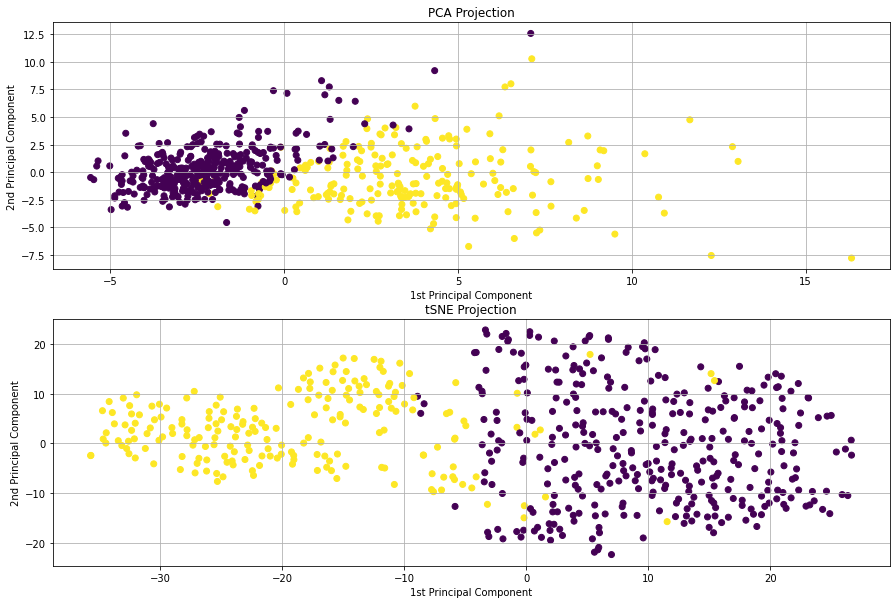

In [89]:
#Let's use another dimensionality analysis technique called t-Distributed Stochastic Neighbor Embedding (tSNE), which has a non-linear approach. We can compare the performance of PCA and tSNE for 2 components and choose how technique use forward.

pca_2 = PCA(n_components=2)
pca_data = pca_2.fit_transform(X_scaled)

tsne_2 = TSNE(n_components=2)
tsne_data = tsne_2.fit_transform(X_scaled)

#Plot 2D projection from tsne and pca 
fig_proj, (p_pca, p_tsne) = plt.subplots(2, 1, figsize=(15, 10))

p_pca.scatter(pca_data[:, 0], pca_data[:, 1], c=y)
p_tsne.scatter(tsne_data[:, 0], tsne_data[:, 1], c=y)

p_pca.set_title('PCA Projection')
p_pca.set_xlabel('1st Principal Component')
p_pca.set_ylabel('2nd Principal Component')

p_pca.grid()

p_tsne.set_title('tSNE Projection')
p_tsne.set_xlabel('1st Principal Component')
p_tsne.set_ylabel('2nd Principal Component')

p_tsne.grid()

Both techniques seems to classify and represent well the dataset with only 2 principal components. However, PCA it will be chosen for computacional reasons, tSNE can be a powerful one for some other applications, but for this project PCA it will be good as well.

In [90]:
#Let's use PCA for 6 principal components and use this results for train a Support Vector Machine, Random Forest Classifier and Logistic Regressor model.

#Split dataset in train and test
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.25, random_state=20)

#PCA
pca_final = PCA(n_components=6)
X_train_pca = pca_final.fit_transform(X_train)
X_test_pca = pca_final.transform(X_test)

#Instance Classifiers

models = [('Logistic Regression', LogisticRegression()),
          ('Random Forest Classifier', RandomForestClassifier()),
          ('Suport Vector Machine', SVC())]

#Training and testing models
results, names = [], []

for name, model in models:
    scores = cross_val_score(model, X_train_pca, y_train, cv=5)
    names.append(name)
    print(str(name) +':'+ str(scores.mean()*100)+'%')

Logistic Regression:96.9439124487004%
Random Forest Classifier:94.83173734610124%
Suport Vector Machine:95.52941176470588%


In [91]:
#Logistic Regression seems to be the better model, let's apply GridSearchCV to find the better parameters

params_lg = {'penalty': ['l1', 'l2'], 
             'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000]}

lg_grid = GridSearchCV(LogisticRegression(), params_lg, cv=5)

lg_grid.fit(X_train_pca, y_train)

/home/mateusrib/.local/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/home/mateusrib/.local/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/home/mateusrib/.local/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py", line 1306, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "/home/mateusrib/.local/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py", line 443, in _check_solver
    raise ValueError("Solver %s supports only 'l2' or 'none' penalties, "
ValueError: Solver lbfgs supports only 'l2' or 'none' penalties, got l1 penalty.

  warnings.warn("Estimator fit failed. The score on this train-test"
/home/mateusrib/.local/lib/python3.8/

GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000],
                         'penalty': ['l1', 'l2']})

In [92]:
#Best estimator
lg_grid.best_estimator_

LogisticRegression(C=10)

In [93]:
#Best Score
lg_grid.best_score_

0.9718194254445965

In [94]:
#Best Parameters
lg_grid.best_params_

{'C': 10, 'penalty': 'l2'}

In [95]:
#Scoring
lg_best = lg_grid.best_estimator_

predictions = lg_best.predict(X_test_pca)

print(classification_report(y_test, predictions))
print(confusion_matrix(y_test, predictions))

              precision    recall  f1-score   support

           0       0.99      0.98      0.98        86
           1       0.97      0.98      0.97        57

    accuracy                           0.98       143
   macro avg       0.98      0.98      0.98       143
weighted avg       0.98      0.98      0.98       143

[[84  2]
 [ 1 56]]


The classifier had a great performance with approximately 98% of accuracy. Although it presented 2 false negatives cases (which is a fatal mistake in a real world case), it can be considered a good prediction model, since some parameters are adjusted for decrease false positive cases.